In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
# Fetch historical stock price data for Amazon
ticker = "AMZN"
start_date = "2010-01-01"
end_date = "2022-01-01"
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Selecting only 'Close' prices
data = data[['Close']]

In [5]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [6]:
# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

# Function to create sequences
def create_sequences(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [7]:
# Reshape into X=t and Y=t+1
time_step = 100
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
73/73 [==============================] - 10s 131ms/step - loss: 0.0037
Epoch 2/25
73/73 [==============================] - 10s 131ms/step - loss: 6.8256e-04
Epoch 3/25
73/73 [==============================] - 10s 131ms/step - loss: 5.9799e-04
Epoch 4/25
73/73 [==============================] - 9s 123ms/step - loss: 5.8230e-04
Epoch 5/25
73/73 [==============================] - 10s 134ms/step - loss: 5.2270e-04
Epoch 6/25
73/73 [==============================] - 13s 184ms/step - loss: 4.7901e-04
Epoch 7/25
73/73 [==============================] - 10s 136ms/step - loss: 4.3696e-04
Epoch 8/25
73/73 [==============================] - 10s 138ms/step - loss: 4.2701e-04
Epoch 9/25
73/73 [==============================] - 10s 131ms/step - loss: 4.0225e-04
Epoch 10/25
73/73 [==============================] - 9s 118ms/step - loss: 4.3154e-04
Epoch 11/25
73/73 [==============================] - 10s 131ms/step - loss: 3.4671e-04
Epoch 12/25
73/73 [==============================] - 10s 1

In [12]:

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 2s 33ms/step


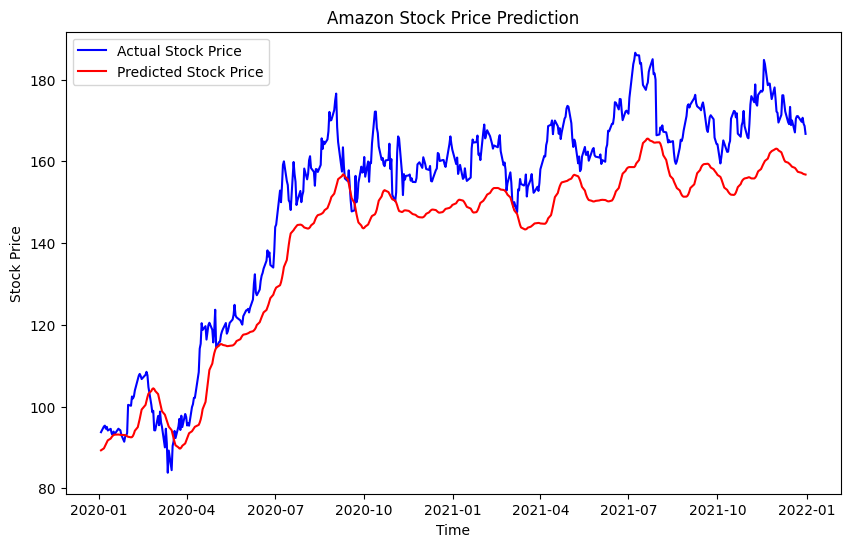

In [13]:
# Visualize the results
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + time_step + 1:], data['Close'].values[train_size + time_step + 1:], color='blue', label='Actual Stock Price')
plt.plot(data.index[train_size + time_step + 1:], predictions, color='red', label='Predicted Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
73/73 [==============================] - 11s 150ms/step - loss: 3.0109e-04
Epoch 2/100
73/73 [==============================] - 10s 132ms/step - loss: 2.6681e-04
Epoch 3/100
73/73 [==============================] - 10s 131ms/step - loss: 3.2029e-04
Epoch 4/100
73/73 [==============================] - 9s 118ms/step - loss: 3.1004e-04
Epoch 5/100
73/73 [==============================] - 10s 132ms/step - loss: 2.8294e-04
Epoch 6/100
73/73 [==============================] - 10s 131ms/step - loss: 3.0532e-04
Epoch 7/100
73/73 [==============================] - 10s 137ms/step - loss: 2.9132e-04
Epoch 8/100
73/73 [==============================] - 9s 119ms/step - loss: 2.8506e-04
Epoch 9/100
73/73 [==============================] - 9s 129ms/step - loss: 3.2530e-04
Epoch 10/100
73/73 [==============================] - 10s 131ms/step - loss: 3.2157e-04
Epoch 11/100
73/73 [==============================] - 10s 131ms/step - loss: 2.7137e-04
Epoch 12/100
73/73 [========================

In [15]:

# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

16/16 [==============================] - 1s 78ms/step


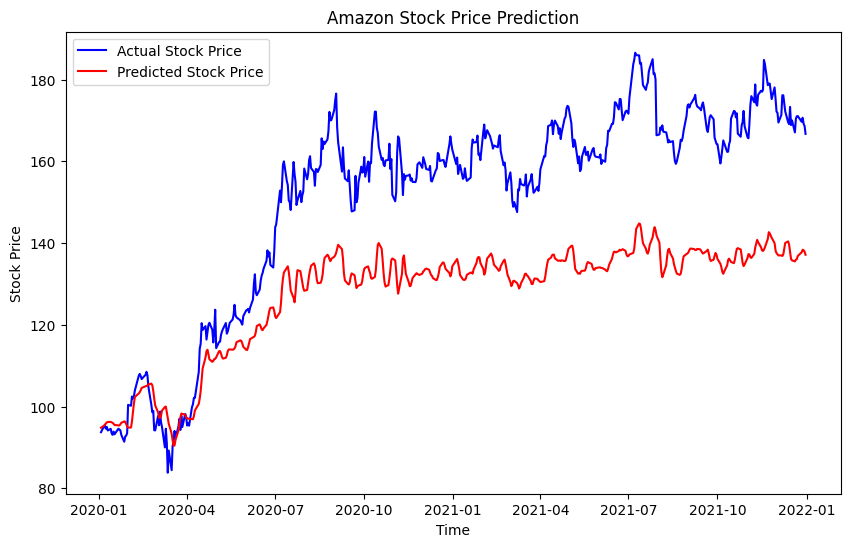

In [16]:
# Visualize the results
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + time_step + 1:], data['Close'].values[train_size + time_step + 1:], color='blue', label='Actual Stock Price')
plt.plot(data.index[train_size + time_step + 1:], predictions, color='red', label='Predicted Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()